3# Problem Statement :
**Build and evaluate the machine learning model for determining the possibility of purchasing a product based on customer’s economic capabilities.**

In [ ]:
! cp /content/Supermarket_sales - Supermarket_sales - Supermarket_sales - Supermarket_sales.csv SupermarketSales.csv #import database

cp: target 'SupermarketSales.csv' is not a directory


# **Step 1 : Data Collection**

In [ ]:
import pandas as pd         # import libraries
import seaborn as sns
import sklearn as sky
import pydotplus
import matplotlib.pyplot as plt
from sklearn import metrics
from six import StringIO
from IPython.display import Image
from sklearn.metrics import f1_score
from sklearn.tree import export_graphviz
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

data = pd.read_csv("SupermarketSales.csv")
data.head()

,InvoiceID,Gender,Products,Quantity,Total,Payment,Salary,Purchased
0,750-67-8428,Female,Health and beauty,7,548.9715,Ewallet,5600,Yes
1,226-31-3081,Female,Electronic accessories,5,80.2200,Cash,3500,Yes
2,631-41-3108,Male,Home and lifestyle,7,340.5255,Credit card,9000,Yes
3,123-19-1176,Male,Health and beauty,8,489.0480,Ewallet,12000,Yes
4,373-73-7910,Male,Sports and travel,7,634.3785,Ewallet,4500,Yes


# **Step 2 : Data Exploration and Data Pre-processing**

**Finding inforation about the data such as :**

1. No of Columns.
2. No of Rows.
3. No of non-null values out of total values.
4. Type of Data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   InvoiceID  999 non-null    object 
 1   Gender     999 non-null    object 
 2   Products   999 non-null    object 
 3   Quantity   999 non-null    int64  
 4   Total      999 non-null    float64
 5   Payment    999 non-null    object 
 6   Salary     999 non-null    int64  
 7   Purchased  999 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 62.6+ KB


In [ ]:
len(data)

999

In [ ]:
data.isnull().any()

InvoiceID    False
Gender       False
Products     False
Quantity     False
Total        False
Payment      False
Salary       False
Purchased    False
dtype: bool

**Describing the data**

In [ ]:
data.describe()

,Quantity,Total,Salary
count,999.00000,999.000000,999.000000
mean,5.66967,345.604364,7279.379379
std,3.08058,286.325665,6073.771202
min,1.00000,10.678500,1000.000000
25%,3.00000,127.921500,3500.000000
50%,6.00000,267.340500,6000.000000
75%,8.00000,495.038250,9000.000000
max,20.00000,2097.610000,84000.000000


In [ ]:
data["Purchased"].value_counts()

Yes    877
No     122
Name: Purchased, dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Creating a instance of label Encoder.
le = LabelEncoder()
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(data["Purchased"])

# printing label
label

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,

# **Step 3 : Data Visualization**

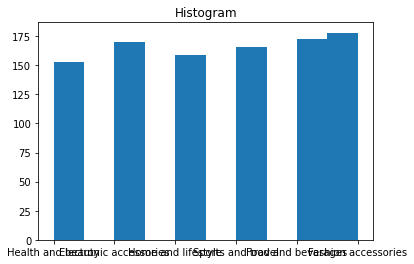

In [ ]:
plt.hist(data['Products'])
plt.title("Histogram")
plt.show()

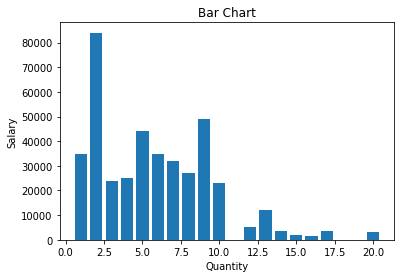

In [ ]:
#Bar Chart
plt.bar(data['Quantity'], data['Salary'])
plt.title("Bar Chart")
plt.xlabel('Quantity')
plt.ylabel('Salary')
plt.show()

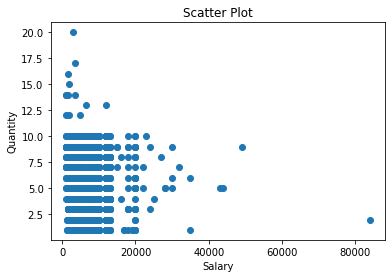

In [ ]:
#Scatter plot
plt.scatter(data['Salary'], data['Quantity'] )
plt.title("Scatter Plot")
plt.xlabel('Salary')
plt.ylabel('Quantity')
plt.show()

Text(0.5, 1.0, 'Not Purchased or Purchased')

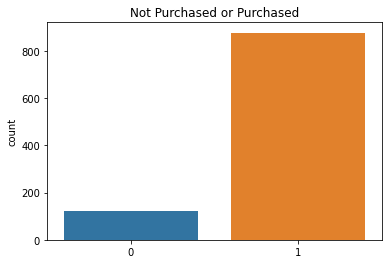

In [ ]:
plt.figure(figsize = (6,4))
sns.countplot(x = label, data = data)
plt.title("Not Purchased or Purchased")

**Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters.**

In [ ]:
x = data.loc[:,['InvoiceID','Gender','Products','Quantity','Total','Payment','Salary']]
y = data.loc[:,'Purchased']

**Feature to feature correlation**

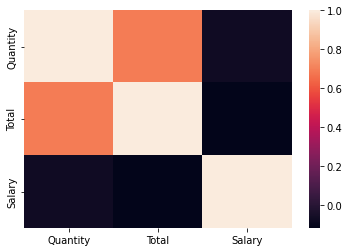

In [ ]:
sns.heatmap(x.corr())

 **Heatmap is often used to find correlation between the features.
Here, we can see that Quantity and Total are highly correlated.
So before proceeding further for feeding data to model we should scale the features.**

# **Step 4 : Data Partitioning**

In [ ]:
x=data[['Salary']] #salary feature..... purchased :target
y=data[['Purchased']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=25)
print(x_train,y_train)
print(x_test,y_test)

     Salary
324    3500
766   10000
19     1000
710    1800
966    4000
..      ...
317    1500
143    3500
474   12000
318   13000
132    9000

[599 rows x 1 columns]     Purchased
324       Yes
766       Yes
19         No
710        No
966       Yes
..        ...
317       Yes
143       Yes
474       Yes
318       Yes
132        No

[599 rows x 1 columns]
     Salary
696    9000
49     8000
288    8000
697   12000
774   43000
..      ...
914    1000
115   13000
400    1500
544    1500
33    12000

[400 rows x 1 columns]     Purchased
696       Yes
49        Yes
288       Yes
697       Yes
774       Yes
..        ...
914        No
115       Yes
400       Yes
544       Yes
33        Yes

[400 rows x 1 columns]


In [ ]:
print(x_train , y_train)
print(x_test , y_test)

     Salary
324    3500
766   10000
19     1000
710    1800
966    4000
..      ...
317    1500
143    3500
474   12000
318   13000
132    9000

[599 rows x 1 columns]     Purchased
324       Yes
766       Yes
19         No
710        No
966       Yes
..        ...
317       Yes
143       Yes
474       Yes
318       Yes
132        No

[599 rows x 1 columns]
     Salary
696    9000
49     8000
288    8000
697   12000
774   43000
..      ...
914    1000
115   13000
400    1500
544    1500
33    12000

[400 rows x 1 columns]     Purchased
696       Yes
49        Yes
288       Yes
697       Yes
774       Yes
..        ...
914        No
115       Yes
400       Yes
544       Yes
33        Yes

[400 rows x 1 columns]


In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [ ]:
print(x_train)

[[-0.59563962]
 [ 0.46124542]
 [-1.00213386]
 [-0.8720557 ]
 [-0.51434077]
 [-0.51434077]
 [ 2.08722241]
 [ 0.29864773]
 [-0.51434077]
 [-0.67693847]
 [ 3.388004  ]
 [-0.83953616]
 [-0.51434077]
 [ 0.78644082]
 [-0.51434077]
 [-0.59563962]
 [ 0.78644082]
 [-0.02654767]
 [ 0.78644082]
 [ 0.29864773]
 [ 0.46124542]
 [-0.67693847]
 [ 2.08722241]
 [-0.83953616]
 [ 0.94903852]
 [ 2.08722241]
 [ 0.46124542]
 [-0.96961432]
 [ 2.08722241]
 [ 0.78644082]
 [ 0.78644082]
 [-0.35174307]
 [-0.35174307]
 [ 0.29864773]
 [-0.83953616]
 [-0.83953616]
 [-0.51434077]
 [-0.59563962]
 [-0.02654767]
 [-0.67693847]
 [ 0.46124542]
 [-0.51434077]
 [-0.59563962]
 [ 0.13605003]
 [-1.00213386]
 [ 0.94903852]
 [-0.67693847]
 [ 0.78644082]
 [-0.35174307]
 [ 0.78644082]
 [-0.59563962]
 [-0.35174307]
 [ 0.29864773]
 [-0.51434077]
 [ 0.13605003]
 [-0.35174307]
 [ 0.13605003]
 [ 0.13605003]
 [-0.59563962]
 [-0.51434077]
 [-0.96961432]
 [-0.51434077]
 [-0.92083501]
 [-0.18914537]
 [-0.96961432]
 [-0.18914537]
 [-0.59563

# **Logistic Regression**

In [ ]:
data.size
data.shape

(999, 8)

In [ ]:
classifier_lr= LogisticRegression()
classifier_lr.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
classifier_lr.predict(x_test)

array(['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes',

In [ ]:
classifier_lr.predict_proba(x_test)

array([[2.33323349e-02, 9.76667665e-01],
       [3.56379949e-02, 9.64362005e-01],
       [3.56379949e-02, 9.64362005e-01],
       [6.41257038e-03, 9.93587430e-01],
       [8.63994376e-09, 9.99999991e-01],
       [1.20331065e-01, 8.79668935e-01],
       [2.33323349e-02, 9.76667665e-01],
       [6.41257038e-03, 9.93587430e-01],
       [8.12449656e-02, 9.18755034e-01],
       [1.45396531e-01, 8.54603469e-01],
       [3.36140076e-01, 6.63859924e-01],
       [3.36140076e-01, 6.63859924e-01],
       [1.20331065e-01, 8.79668935e-01],
       [3.36140076e-01, 6.63859924e-01],
       [1.52087594e-02, 9.84791241e-01],
       [3.36140076e-01, 6.63859924e-01],
       [3.56379949e-02, 9.64362005e-01],
       [1.74646631e-01, 8.25353369e-01],
       [4.39229090e-01, 5.60770910e-01],
       [3.96805830e-01, 6.03194170e-01],
       [8.12449656e-02, 9.18755034e-01],
       [7.28116431e-04, 9.99271884e-01],
       [5.40744257e-02, 9.45925574e-01],
       [3.86412537e-01, 6.13587463e-01],
       [1.746466

In [ ]:
y_pred_lr = classifier_lr.predict(x_test)

#ACCURACY OF THE BUILT MODEL
acc_lr = metrics.accuracy_score(y_test, y_pred_lr)*100
print("Accuracy for Logistic Regression Model is : ", acc_lr)

Accuracy for Logistic Regression Model is :  90.25


In [ ]:
f1_lr = f1_score(y_test, y_pred_lr,pos_label='positive',average='micro')*100

print("F1 score for Logistic Regression is ",f1_lr)

F1 score for Logistic Regression is  90.25


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


# **Naive Bayes**

In [ ]:
classifier_nb= GaussianNB()
classifier_nb.fit(x_train, y_train)
GaussianNB()
y_pred_nb = classifier_nb.predict(x_test)

#ACCURACY OF THE BUILT MODEL
acc_nb = metrics.accuracy_score(y_test, y_pred_nb)*100
print("Accuracy for Naive Bayes Model is : ", acc_nb)

print(classification_report(y_test, y_pred_nb))

Accuracy for Naive Bayes Model is :  90.25
              precision    recall  f1-score   support

          No       0.00      0.00      0.00        39
         Yes       0.90      1.00      0.95       361

    accuracy                           0.90       400
   macro avg       0.45      0.50      0.47       400
weighted avg       0.81      0.90      0.86       400



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and

In [ ]:
#confusion matrix
confum =confusion_matrix(y_test,y_pred_nb)
print(confum)

[[  0  39]
 [  0 361]]


In [ ]:
f1_nb = f1_score(y_test, y_pred_nb,pos_label='positive',average='micro')*100

print("F1 score for Naive Bayes is ",f1_nb)

F1 score for Naive Bayes is  90.25


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


# **Decision Tree**

In [ ]:
classifier_dt = DecisionTreeClassifier()
classifier_dt =classifier_dt.fit(x_train,y_train)

In [ ]:
y_pred_dt = classifier_dt.predict(x_test)
print(y_pred_dt)

['Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Y

In [ ]:
print('Accuracy score for Decision Tree : ',metrics.accuracy_score(y_test,y_pred_dt)*100)
print(classification_report(y_test, y_pred_dt))

Accuracy score for Decision Tree :  95.0
              precision    recall  f1-score   support

          No       1.00      0.49      0.66        39
         Yes       0.95      1.00      0.97       361

    accuracy                           0.95       400
   macro avg       0.97      0.74      0.81       400
weighted avg       0.95      0.95      0.94       400



In [ ]:
confmat=confusion_matrix(y_test,y_pred_dt)
print(confmat)

[[ 19  20]
 [  0 361]]


In [ ]:
!pip install six

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


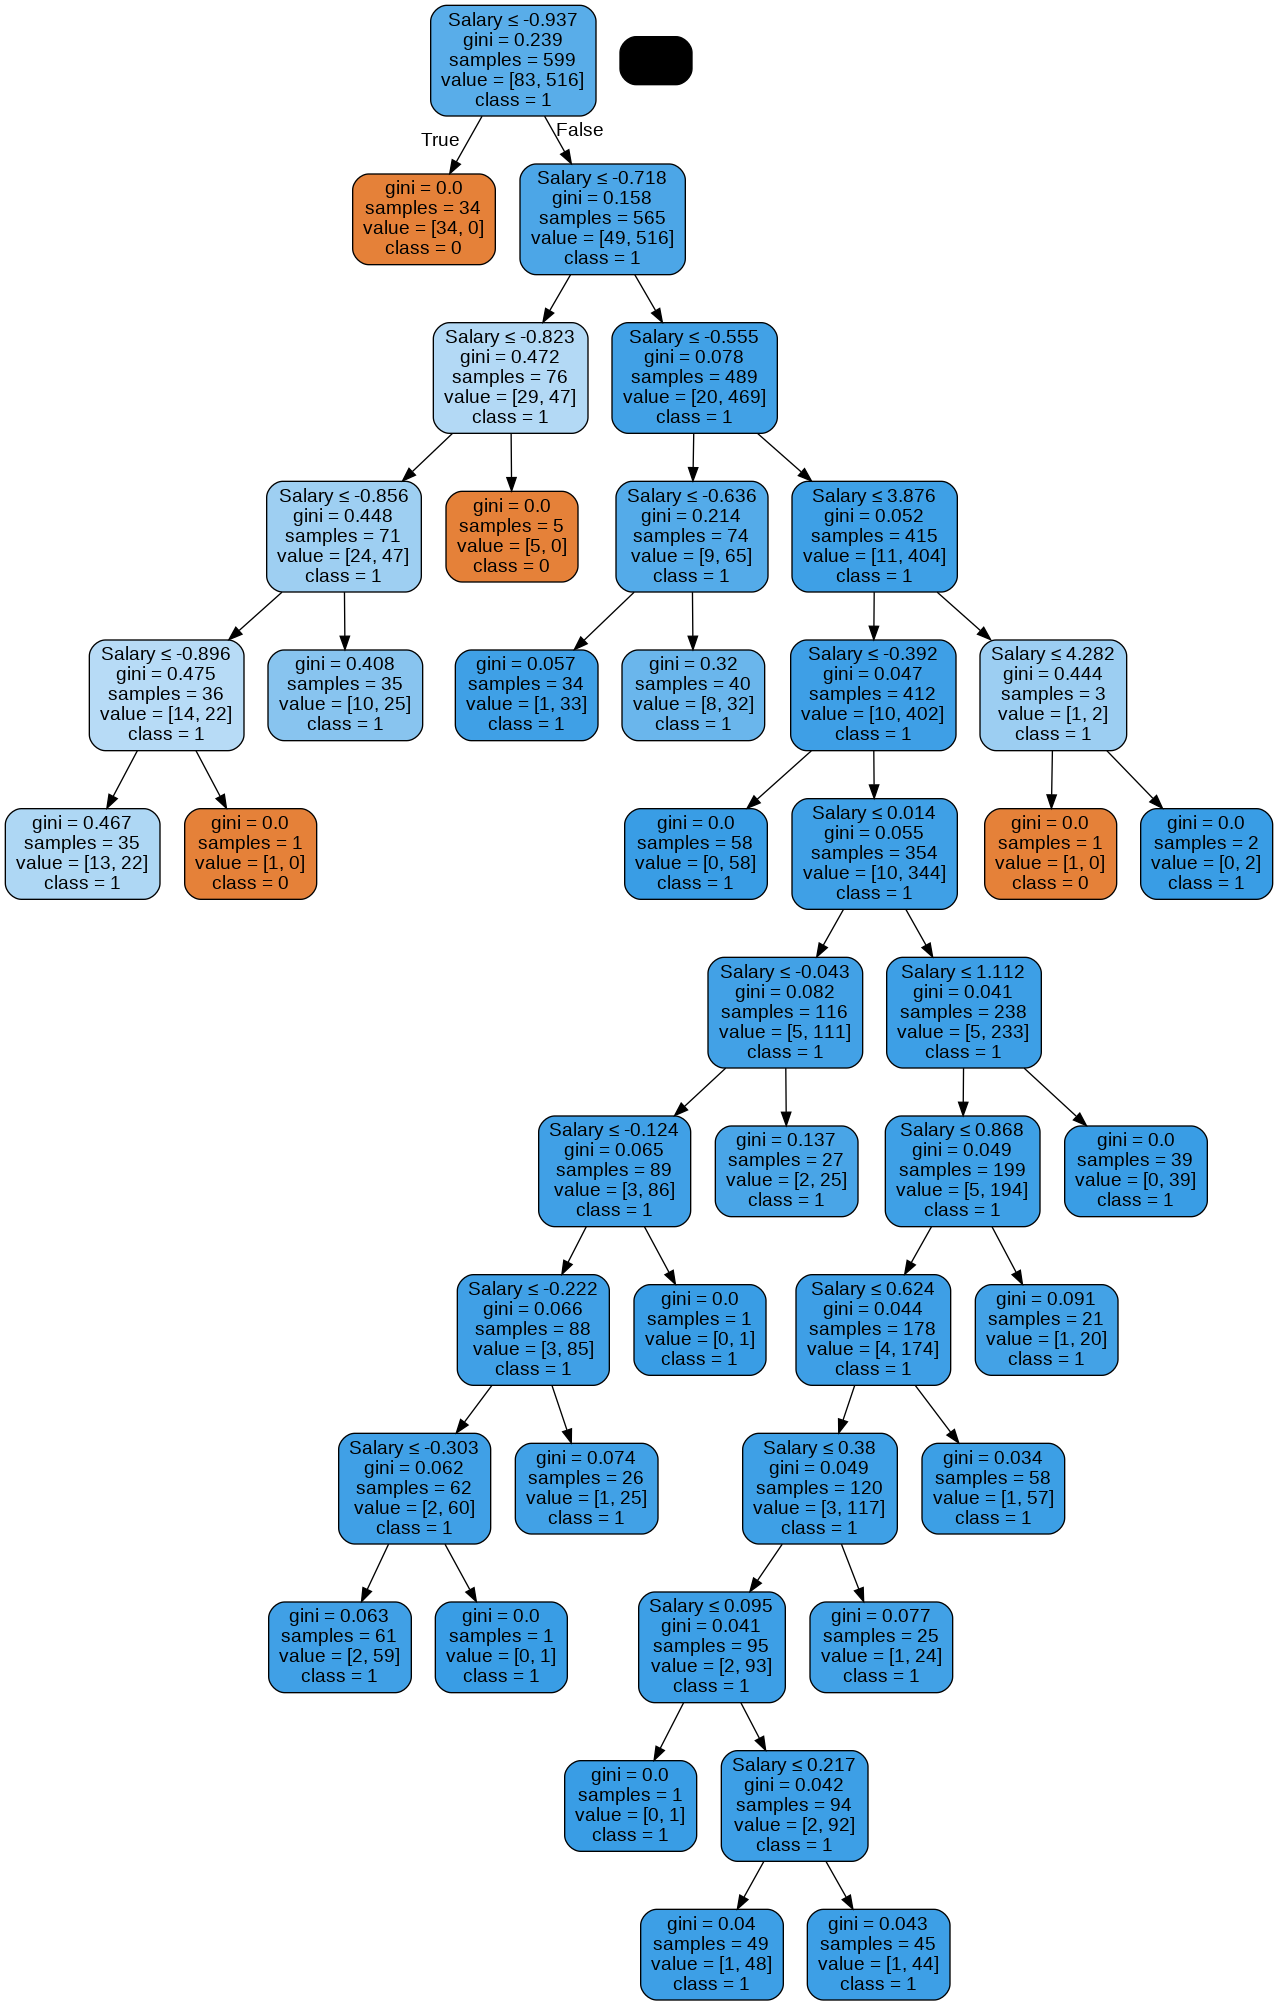

In [ ]:
data = StringIO()
export_graphviz(classifier_dt,out_file=data , filled = True , rounded = True , special_characters= True , feature_names =x.columns , class_names=('0','1'))
graph = pydotplus.graph_from_dot_data(data.getvalue())
Image(graph.create_png())

In [ ]:
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
classifier_dt = classifier_dt.fit(x_train, y_train)
y_pred = classifier_dt.predict(x_test)
acc_dt = metrics.accuracy_score(y_test, y_pred)*100
print('Accuracy score for Decision Tree : ',acc_dt)
print(classification_report(y_test, y_pred))

Accuracy score for Decision Tree :  95.0
              precision    recall  f1-score   support

          No       1.00      0.49      0.66        39
         Yes       0.95      1.00      0.97       361

    accuracy                           0.95       400
   macro avg       0.97      0.74      0.81       400
weighted avg       0.95      0.95      0.94       400



In [ ]:
classifier_dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
classifier_dt = classifier_dt.fit(x_train, y_train)
y_pred = classifier_dt.predict(x_test)
acc_dt = metrics.accuracy_score(y_test, y_pred)*100
print('Accuracy score for Decision Tree : ',acc_dt)
print(classification_report(y_test, y_pred))

Accuracy score for Decision Tree :  95.0
              precision    recall  f1-score   support

          No       1.00      0.49      0.66        39
         Yes       0.95      1.00      0.97       361

    accuracy                           0.95       400
   macro avg       0.97      0.74      0.81       400
weighted avg       0.95      0.95      0.94       400



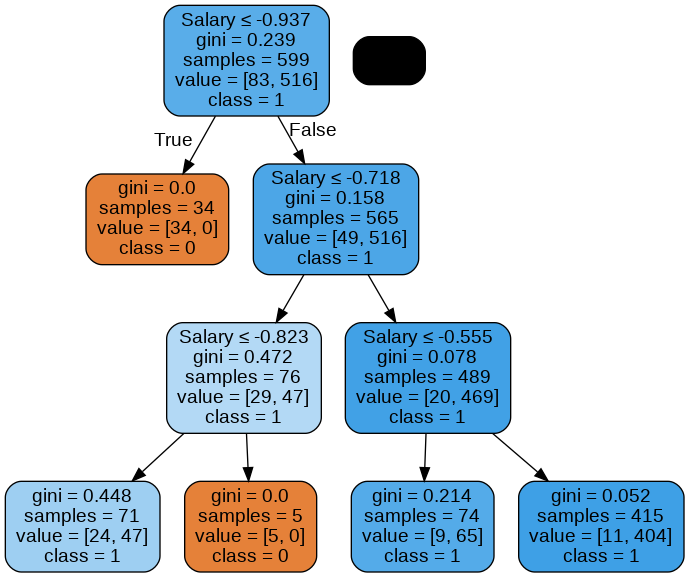

In [ ]:
d = StringIO()
export_graphviz(classifier_dt,out_file=d , filled = True , rounded = True , special_characters= True , feature_names = x.columns,
                class_names = ['0','1'] )
graph = pydotplus.graph_from_dot_data(d.getvalue())
Image(graph.create_png())

In [ ]:
acc_dt = metrics.accuracy_score(y_test, y_pred)*100
print('Accuracy score for Decision Tree : ',acc_dt)
print(classification_report(y_test, y_pred))

Accuracy score for Decision Tree :  95.0
              precision    recall  f1-score   support

          No       1.00      0.49      0.66        39
         Yes       0.95      1.00      0.97       361

    accuracy                           0.95       400
   macro avg       0.97      0.74      0.81       400
weighted avg       0.95      0.95      0.94       400



In [ ]:
f1_dt = f1_score(y_test, y_pred_dt,pos_label='positive',average='micro')*100

print("F1 score for Decision Tree is ",f1_dt)

F1 score for Decision Tree is  95.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


# **K nearest neighbours Algorithm**

knn score for k = 1 : 91.75 
knn score for k = 2 : 90.75 
knn score for k = 3 : 95.0 


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

knn score for k = 4 : 95.0 
knn score for k = 5 : 94.75 
knn score for k = 6 : 94.75 


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


knn score for k = 7 : 94.75 
knn score for k = 8 : 94.75 
knn score for k = 9 : 94.75 
knn score for k = 10 : 94.75 


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


(90.0, 96.0)

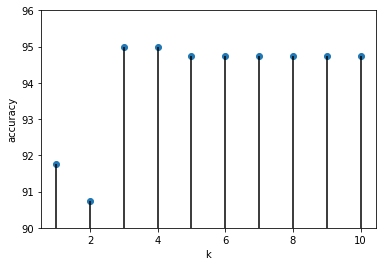

In [ ]:
k_range = range(1,11)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    sc = knn.score(x_test, y_test)*100
    scores.append(sc)
    print("knn score for k = {} : {} ".format(k,sc))

plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.vlines(k_range, 0 , scores)
plt.ylim(90,96)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

acc_knn = metrics.accuracy_score(y_test, y_pred_knn)*100

print("KNN Accuracy is: ", acc_knn)
print(classification_report(y_test,y_pred_knn))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNN Accuracy is:  95.0
              precision    recall  f1-score   support

          No       1.00      0.49      0.66        39
         Yes       0.95      1.00      0.97       361

    accuracy                           0.95       400
   macro avg       0.97      0.74      0.81       400
weighted avg       0.95      0.95      0.94       400



In [ ]:
#Print Train Accuracy
knn_train_accuracy = knn.score(x_train,y_train)
print("knn_train_accuracy = ",knn.score(x_train,y_train)*100)
#Print Test Accuracy
knn_test_accuracy = knn.score(x_test,y_test)
print("knn_test_accuracy = ",knn.score(x_test,y_test)*100)

knn_train_accuracy =  92.65442404006677
knn_test_accuracy =  95.0


In [ ]:
f1_knn = f1_score(y_test, y_pred_knn,pos_label='positive',average='micro')*100

print("F1 score for KNN is ",f1_knn)

F1 score for KNN is  95.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


# **Step 5 : Evaluating the model performance**

In [ ]:
accuracies = []
models = []

accuracies.append(acc_lr)
models.append("Logistic Regression")

accuracies.append(acc_nb)
models.append("Naive Bayes")

accuracies.append(acc_knn)
models.append("K nearest neighbours")

accuracies.append(acc_dt)
models.append("Decision Tree ")

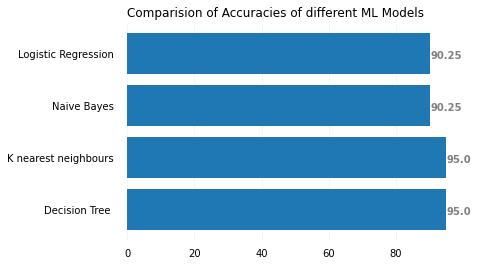

In [ ]:
# Figure Size
fig, ax = plt.subplots(figsize =(6, 4))

# Horizontal Bar Plot
ax.barh(models, accuracies)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

# Add Plot Title
ax.set_title('Comparision of Accuracies of different ML Models',
             loc ='left', )

# Show Plot
plt.show()

In [ ]:
f1_scores = []

f1_scores.append(f1_lr)
f1_scores.append(f1_knn)
f1_scores.append(f1_dt)
f1_scores.append(f1_nb)


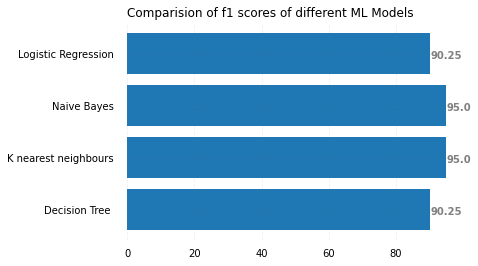

In [ ]:
# Figure Size
fig, ax = plt.subplots(figsize =(6, 4))

# Horizontal Bar Plot
ax.barh(models,f1_scores)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

# Add Plot Title
ax.set_title('Comparision of f1 scores of different ML Models',
             loc ='left', )

# Show Plot
plt.show()

# **Selected ML Model is Decision Tree**

In [ ]:
type(x_test)

numpy.ndarray

In [ ]:
type(data)

_io.StringIO

In [ ]:
data.seekable()

True